In [1]:
# import hierarchical clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building

In [2]:
#Read the data
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
#Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [4]:
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
#Normalized data frame(considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [6]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
new_df = normalize.fit_transform(crime.iloc[:,1:].to_numpy())
df_norm1 = pd.DataFrame(new_df, columns = crime.columns[1:])
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


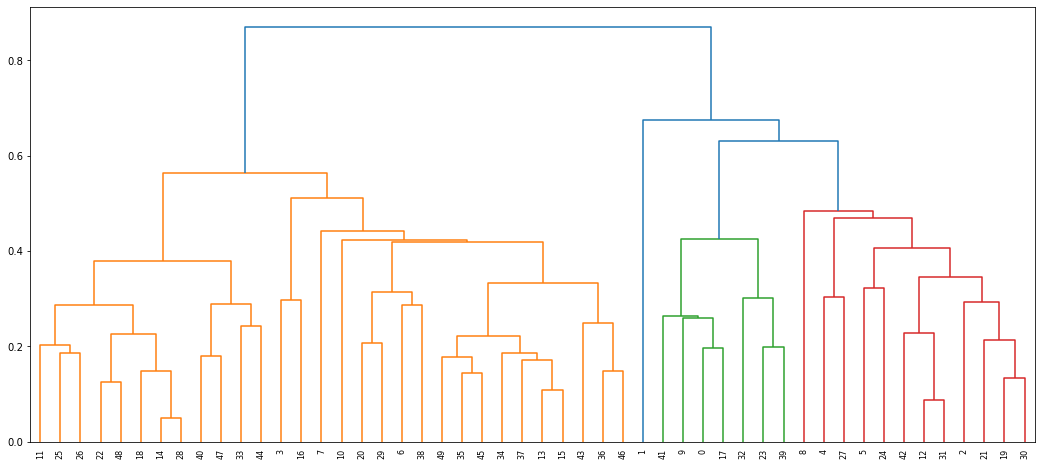

In [7]:
# Create dendrogram
plt.figure(figsize=(18,8))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [8]:
# Create clusters
hc = AgglomerativeClustering(n_clusters = 3,
                            affinity = 'euclidean',
                            linkage = 'average')

In [9]:
hc

AgglomerativeClustering(linkage='average', n_clusters=3)

In [10]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [11]:
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])
Clusters

,Clusters
0,0
1,2
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [12]:
df_norm['h_clusterid'] = Clusters

In [13]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [14]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


In [15]:
crime['h_clusterid'] = Clusters

In [16]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [17]:
crime.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [18]:
crime['h_clusterid']=hc.labels_

In [19]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [20]:
# ###KMeans

In [21]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [22]:
#Read the data
crime1 = pd.read_csv("crime_data.csv")
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [23]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime1_df = scaler.fit_transform(crime1.iloc[:,1:])
scaled_crime1_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [24]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_crime1_df)

KMeans(n_clusters=4, random_state=0)

In [25]:
kmeans.inertia_

57.55425863091104

In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
wcss = []
sil_score = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_crime1_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue #min 2 labels needed for silhoutte and cal_haz score (Refer documentation)
    sil_score.append(silhouette_score(scaled_crime1_df, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_crime1_df, kmeans.labels_))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

In [28]:
sil_score

[0.4084890326217641,
 0.3095091512791688,
 0.33968891433344395,
 0.30612803169146263,
 0.29910456843899946,
 0.23035904501364113,
 0.2732934287338534,
 0.2518939934580804,
 0.2652233759332704]

In [29]:
cal_haz_score

[43.46199150301377,
 35.18481487211701,
 37.94972059900646,
 33.28658302470653,
 31.26605066475041,
 28.205209929782704,
 28.594705898193535,
 26.214354074691737,
 26.952143948781234]

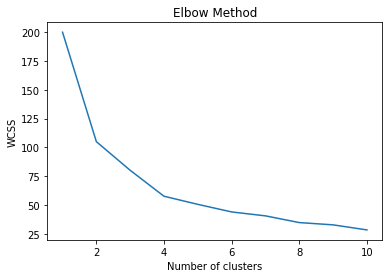

In [30]:
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([1, 3, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [32]:
x = pd.Series(model.labels_)
crime1['Clust']=x

In [33]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


In [34]:
crime1.iloc[:,1:5].groupby(crime1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,5.841176,141.882353,72.470588,18.823529
1,12.278947,254.842105,69.473684,28.357895
2,3.600000,78.538462,52.076923,12.176923
3,10.000000,263.000000,48.000000,44.500000


In [35]:
#Build cluster algorithm
clusters_new = KMeans(5, random_state = 42)
clusters_new.fit(scaled_crime1_df)

KMeans(n_clusters=5, random_state=42)

In [36]:
clusters_new.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 1, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 2, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [37]:
#Assign clusters to the data set
crime1['clusterid_new'] = clusters_new.labels_

In [38]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,clusterid_new
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,3


In [39]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.63817386, -0.38827513,  0.88223651, -0.27797516],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.15956455, -0.44557535, -0.39437496, -0.32460067],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445]])

In [40]:
crime1.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8216\553629180.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime1.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape,Clust
,,mean,mean,mean,mean,mean
0,0,5.036364,138.727273,78.181818,18.654545,0.000000
1,1,10.815385,257.384615,76.000000,33.192308,1.153846
2,2,7.100000,134.000000,59.888889,18.222222,0.666667
3,3,14.671429,251.285714,54.285714,21.685714,1.000000
4,4,2.680000,70.100000,51.000000,10.910000,2.000000


In [41]:
crime1.groupby('clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape,Clust
clusterid_new,,,,,
0,5.036364,138.727273,78.181818,18.654545,0.000000
1,10.815385,257.384615,76.000000,33.192308,1.153846
2,7.100000,134.000000,59.888889,18.222222,0.666667
3,14.671429,251.285714,54.285714,21.685714,1.000000
4,2.680000,70.100000,51.000000,10.910000,2.000000


In [42]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,clusterid_new
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,3,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,1,3


In [43]:
crime1[crime1['clusterid_new']==3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,clusterid_new
0,Alabama,13.2,236,58,21.2,1,3
9,Georgia,17.4,211,60,25.8,1,3
17,Louisiana,15.4,249,66,22.2,1,3
23,Mississippi,16.1,259,44,17.1,1,3
32,North Carolina,13.0,337,45,16.1,1,3
39,South Carolina,14.4,279,48,22.5,1,3
41,Tennessee,13.2,188,59,26.9,1,3


In [44]:
crime1[crime1['clusterid_new']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,clusterid_new
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
10,Hawaii,5.3,46,83,20.2,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
29,New Jersey,7.4,159,89,18.8,0,0
34,Ohio,7.3,120,75,21.4,0,0
36,Oregon,4.9,159,67,29.3,0,0
37,Pennsylvania,6.3,106,72,14.9,0,0
38,Rhode Island,3.4,174,87,8.3,0,0
43,Utah,3.2,120,80,22.9,0,0


In [45]:
crime1.sort_values('clusterid_new')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust,clusterid_new
46,Washington,4.0,145,73,26.2,0,0
20,Massachusetts,4.4,149,85,16.3,0,0
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
34,Ohio,7.3,120,75,21.4,0,0
10,Hawaii,5.3,46,83,20.2,0,0
43,Utah,3.2,120,80,22.9,0,0
29,New Jersey,7.4,159,89,18.8,0,0
36,Oregon,4.9,159,67,29.3,0,0
38,Rhode Island,3.4,174,87,8.3,0,0


In [46]:
crime1['clusterid_new'].value_counts()

1    13
0    11
4    10
2     9
3     7
Name: clusterid_new, dtype: int64

In [47]:
crime1.groupby(['clusterid_new'])['Unnamed: 0'].apply(lambda x: tuple(x))

clusterid_new
0    (Connecticut, Delaware, Hawaii, Massachusetts,...
1    (Alaska, Arizona, California, Colorado, Florid...
2    (Arkansas, Indiana, Kansas, Kentucky, Montana,...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
Name: Unnamed: 0, dtype: object

In [48]:
###DBSCAN

In [49]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [50]:
#Read the data
crime2 = pd.read_csv("crime_data.csv")
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [51]:
crime2.shape

(50, 5)

In [52]:
crime2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [53]:
print(crime2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [54]:
df = crime2.iloc[:,1:5]

In [55]:
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [56]:
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

<AxesSubplot:>

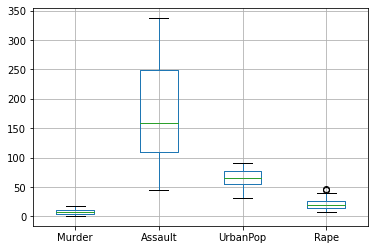

In [57]:
df.boxplot()

In [58]:
array = df.values

In [59]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [60]:
stscaler = StandardScaler().fit(df.values)
X = stscaler.transform(array)

In [61]:
x

0     1
1     3
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     1
10    0
11    2
12    1
13    0
14    2
15    0
16    2
17    1
18    2
19    1
20    0
21    1
22    2
23    1
24    1
25    2
26    2
27    1
28    2
29    0
30    1
31    1
32    1
33    2
34    0
35    0
36    0
37    0
38    0
39    1
40    2
41    1
42    1
43    0
44    2
45    0
46    0
47    2
48    2
49    0
dtype: int32

In [62]:
min_samples = 4
dbscan = DBSCAN(eps = 2, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=2)

In [63]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [64]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [65]:
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [66]:
clustered = pd.concat([crime2,cl], axis=1)

In [67]:
clustered

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [68]:
clustered[clustered['cluster'] == -1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1


In [69]:
clustered.mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8216\2647209638.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clustered.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
cluster      -0.020
dtype: float64

In [70]:
clustered.sort_values('cluster')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
0,Alabama,13.2,236,58,21.2,0
27,Nevada,12.2,252,81,46.0,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
30,New Mexico,11.4,285,70,32.1,0
31,New York,11.1,254,86,26.1,0
32,North Carolina,13.0,337,45,16.1,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0


In [71]:
X.shape

(50, 4)

In [72]:
min_samples

4

In [73]:
#DBSCAN ON SAMPLE DATASET

In [74]:
from sklearn.datasets import make_moons, make_blobs

X, y = make_moons(1000)
X = X + np.random.rand(1000, 2)*0.4

In [75]:
data = pd.DataFrame(X)
data.columns=['feature 1', 'feature 2']
data['class'] = y
data

,feature 1,feature 2,class
0,2.189903,0.466363,1
1,1.686709,0.024801,1
2,0.585328,-0.098835,1
3,0.285857,0.698822,1
4,1.236162,0.399907,0
...,...,...,...
995,0.621746,1.184480,0
996,-0.029417,1.014509,0
997,0.509066,1.080675,0
998,-0.469439,0.920077,0


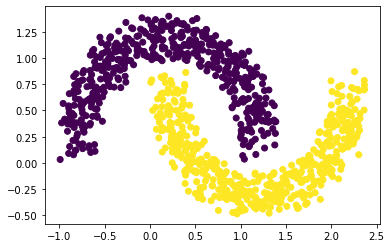

In [76]:
plt.scatter(data['feature 1'], data['feature 2'], c = y)

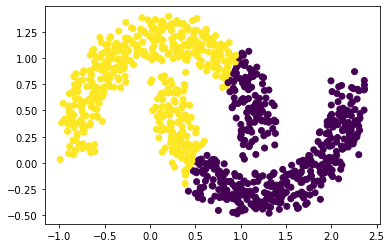

In [77]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters = 2, max_iter = 5, algorithm = 'auto')
model_kmeans.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_kmeans.labels_)

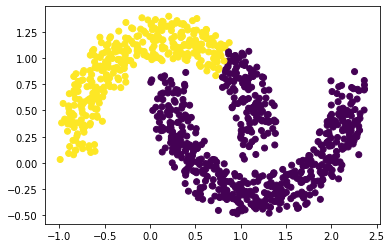

In [78]:
from sklearn.cluster import AgglomerativeClustering
model_agglo = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
model_agglo.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_agglo.labels_)

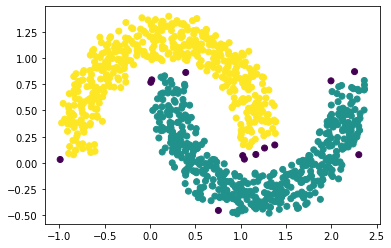

In [79]:
model_dbscan = DBSCAN(eps = 0.1, min_samples = 3)
model_dbscan.fit(data.iloc[:,:2])
plt.scatter(data['feature 1'], data['feature 2'], c = model_dbscan.labels_)

In [80]:
from sklearn.metrics import silhouette_score
silhouette_score(data.iloc[:,:3], model_dbscan.labels_)

0.333211526255586

In [81]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(data.iloc[:,:3], model_dbscan.labels_)

518.4632926319441